In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
%matplotlib inline

/Users/perdue/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [6]:
f = h5py.File('../HDF5files/minosmatch_nukecczdefs_genallz_pcodecap66_muondat_127x50x25_xuv_me1Bmc.hdf5', 'r')

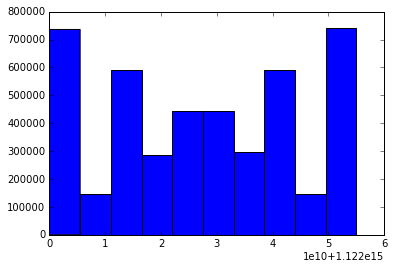

In [7]:
n, bins, patches = plt.hist(f['eventids'])

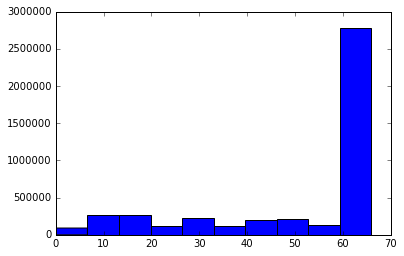

In [8]:
n, bins, patches = plt.hist(f['planecodes'])

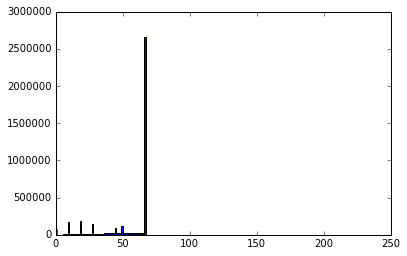

In [9]:
_, _, _ = plt.hist(f['planecodes'], bins=214, range=(0, 214))

In [10]:
import plane_codes

In [11]:
plane_codes.build_reversed_indexed_codes()

{0: (-999, -999, -999),
 1: (-5, 1, 0),
 2: (-5, 2, 0),
 3: (-4, 1, 0),
 4: (-4, 2, 0),
 5: (-3, 1, 0),
 6: (-3, 2, 0),
 7: (-2, 1, 0),
 8: (-2, 2, 0),
 9: (-1, 0, 1),
 10: (0, 1, 0),
 11: (0, 2, 0),
 12: (1, 1, 0),
 13: (1, 2, 0),
 14: (2, 1, 0),
 15: (2, 2, 0),
 16: (3, 1, 0),
 17: (3, 2, 0),
 18: (4, 0, 2),
 19: (5, 1, 0),
 20: (5, 2, 0),
 21: (6, 1, 0),
 22: (6, 2, 0),
 23: (7, 1, 0),
 24: (7, 2, 0),
 25: (8, 1, 0),
 26: (8, 2, 0),
 27: (9, 0, 3),
 28: (11, 1, 0),
 29: (11, 2, 0),
 30: (12, 1, 0),
 31: (12, 2, 0),
 32: (13, 1, 0),
 33: (13, 2, 0),
 34: (14, 1, 0),
 35: (14, 2, 0),
 36: (15, 1, 0),
 37: (15, 2, 0),
 38: (16, 1, 0),
 39: (16, 2, 0),
 40: (17, 1, 0),
 41: (17, 2, 0),
 42: (18, 1, 0),
 43: (18, 2, 0),
 44: (19, 0, 4),
 45: (20, 1, 0),
 46: (20, 2, 0),
 47: (21, 1, 0),
 48: (21, 2, 0),
 49: (22, 0, 5),
 50: (23, 1, 0),
 51: (23, 2, 0),
 52: (24, 1, 0),
 53: (24, 2, 0),
 54: (25, 1, 0),
 55: (25, 2, 0),
 56: (26, 1, 0),
 57: (26, 2, 0),
 58: (27, 1, 0),
 59: (27, 2, 0),


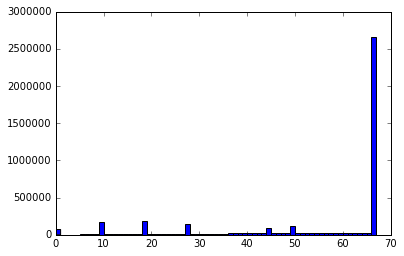

In [12]:
n, bins, patches = plt.hist(f['planecodes'], bins=np.arange(71))

In [13]:
planes = np.zeros(np.shape(f['planecodes']))
f['planecodes'].read_direct(planes)

(array([  7.11440000e+04,   1.52000000e+03,   1.75700000e+03,
          2.10900000e+03,   3.17700000e+03,   5.10600000e+03,
          6.32600000e+03,   1.31250000e+04,   1.41140000e+04,
          1.76750000e+05,   1.49520000e+04,   1.51970000e+04,
          1.50190000e+04,   1.54540000e+04,   1.55090000e+04,
          1.55950000e+04,   1.51900000e+04,   1.57350000e+04,
          1.90904000e+05,   1.61390000e+04,   1.56610000e+04,
          1.59370000e+04,   1.61900000e+04,   1.60990000e+04,
          1.61910000e+04,   1.63660000e+04,   1.64950000e+04,
          1.46343000e+05,   1.65980000e+04,   1.67990000e+04,
          1.67720000e+04,   1.70830000e+04,   1.69300000e+04,
          1.68750000e+04,   1.68330000e+04,   1.74380000e+04,
          1.76690000e+04,   1.81940000e+04,   1.80520000e+04,
          1.80830000e+04,   1.79050000e+04,   1.83170000e+04,
          1.81710000e+04,   1.84730000e+04,   8.78840000e+04,
          1.86770000e+04,   1.86950000e+04,   1.87930000e+04,
        

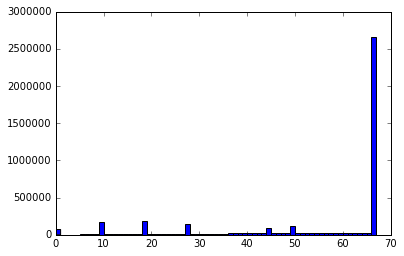

In [14]:
plt.hist(planes[planes < 70], bins=np.arange(71))  # last bins are `[67, 68), [68, 69), [69, 70)`

65
66


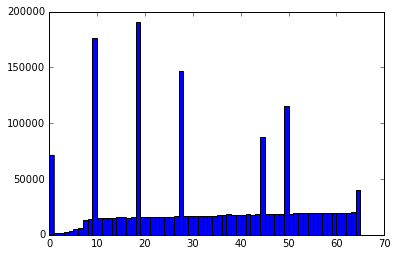

In [27]:
n, bins, _ = plt.hist(planes[planes < 66], bins=np.arange(66))
print len(n)
print len(bins)

In [16]:
print any(planes == 67)

False


In [17]:
print any(planes > 66)

False


In [18]:
print any(planes < 0)

False


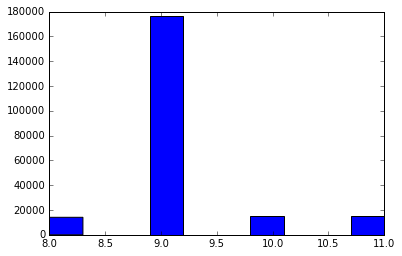

In [19]:
a = np.where(planes >= 8)
b = np.where(planes <= 11)
c = list(set(a[0]) & set(b[0]))
n, bins, patches = plt.hist(planes[c])    # tgt1 == 9

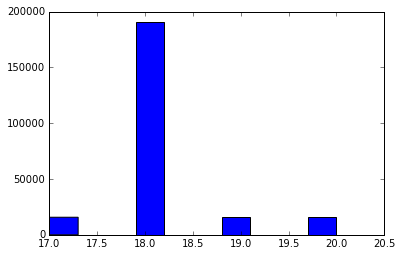

In [20]:
a = np.where(planes >= 17)
b = np.where(planes <= 20)
c = list(set(a[0]) & set(b[0]))
n, bins, patches = plt.hist(planes[c])    # tgt2 == 18

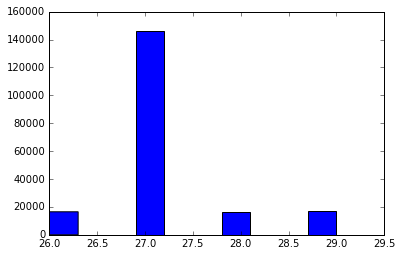

In [21]:
a = np.where(planes >= 26)
b = np.where(planes <= 29)
c = list(set(a[0]) & set(b[0]))
n, bins, patches = plt.hist(planes[c])    # tgt3 == 27

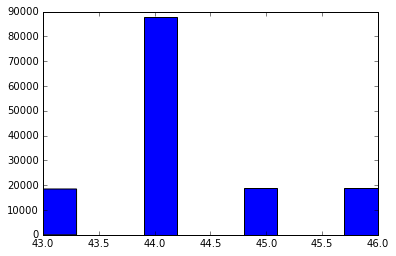

In [22]:
a = np.where(planes >= 43)
b = np.where(planes <= 46)
c = list(set(a[0]) & set(b[0]))
n, bins, patches = plt.hist(planes[c])    # tgt4 == 44

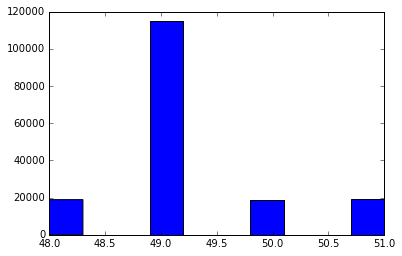

In [23]:
a = np.where(planes >= 48)
b = np.where(planes <= 51)
c = list(set(a[0]) & set(b[0]))
n, bins, patches = plt.hist(planes[c])    # tgt5 == 49

In [24]:
segments = np.zeros(np.shape(f['segments']))
f['segments'].read_direct(segments)

(array([   40958.,   219502.,   236782.,   194473.,   141694.,   182229.,
           78408.,    82530.,   230250.,    20864.,  2991940.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 11 Patch objects>)

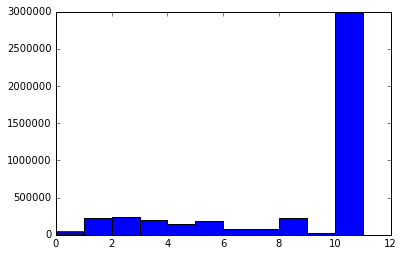

In [25]:
plt.hist(segments, bins=np.arange(12))

In [26]:
print np.min(planes)
print np.max(planes)

0.0
66.0
